In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

Taking into account the corresponding SDE
$$
\frac{dn}{dt} = \alpha - \beta n + \xi(t)
$$
where $\xi(t)$ represents an external noise term.

We take correlation time $\tau \rightarrow 0$, and so we are drawing our random number for the noise term from a gaussian distribution with mean 0 and variance $D \Delta t$.

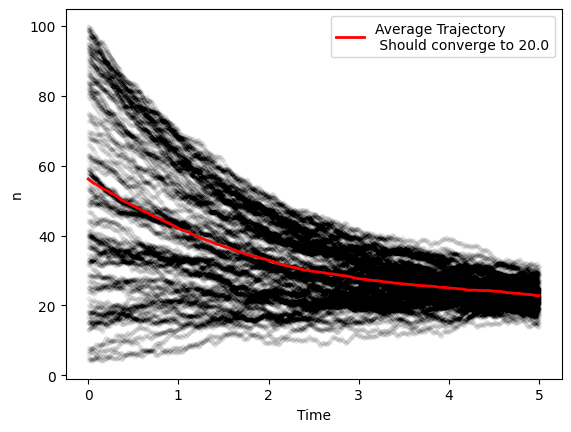

In [21]:
alpha = 10
beta = 0.5
delta_t = 0.001
t_f = 5
D = 10

def euler_noisy(alpha, beta, delta_t, t_f, D):
    states = [random.randint(0,100)] #Initial n
    t = 0
    t += delta_t
    while t < t_f:
        states.append(states[-1] + delta_t * (alpha - beta * states[-1]) + np.random.normal(0, np.sqrt(D * delta_t)))
        """
        sqrt needed as random.normal takes (mean, std)
        """
        t += delta_t
        

    return states

n_sims = 100
def simulator(n_sims):
    states_all = []
    
    for i in range(n_sims):
        states_all.append(euler_noisy(alpha, beta, delta_t, t_f, D))

    return states_all
states_all = simulator(n_sims)
time = np.arange(delta_t, t_f + delta_t, delta_t)

for state in states_all:
    plt.plot(time, state, "k.", alpha = 0.005)

plt.plot(time, np.mean(states_all, axis = 0), "r-", label = f"Average Trajectory \n Should converge to {alpha/beta}", lw = 2)

plt.xlabel("Time")
plt.ylabel("n")
plt.legend()